# DETECCION DE PEATONES CON HOG Y SVM


# Se cargan las bibliotecas necesarias

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog

# Se importan los dos datasets 
### https://docs.python.org/3/library/glob.html

In [41]:
import glob
#vehicle = glob.glob("data_svm/vehicles/**/*.png")
#no_vehicle = glob.glob("data_svm/non-vehicles/**/*.png")

peaton = glob.glob("peatones/si_peatones/*.ppm")
no_peaton = glob.glob("peatones/no_peatones/*.jpg")

In [42]:
#len(vehicle)
len(peaton)

924

In [40]:
#len(no_vehicle)
len(no_peaton)

50

# Se muestra una imagen con vehículo

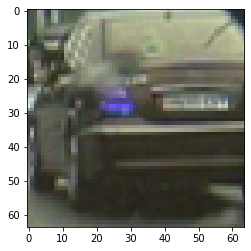

In [5]:
img_color = cv2.imread(vehicle[10])
plt.imshow(img_color)

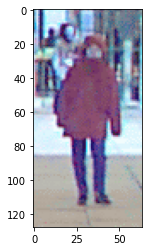

In [43]:
img_color_peaton = cv2.imread(peaton[5])
plt.imshow(img_color_peaton)

# Para fines de demostración se calcula el HOG de la imagen

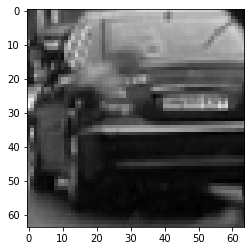

In [6]:
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

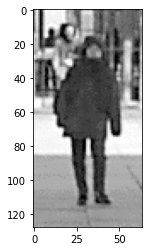

In [44]:
img_gray_peaton = cv2.cvtColor(img_color_peaton,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray_peaton,cmap="gray")

In [45]:
#features,hog_img = hog(img_gray,
#                       orientations = 9,
#                      pixels_per_cell = (16,16),
#                     cells_per_block = (1,1),
#                    transform_sqrt = False,
#                       visualize = True,
#                       feature_vector = True)

In [52]:
features,hog_img = hog(img_gray_peaton,
                       orientations = 11,
                       pixels_per_cell = (16,16),
                       cells_per_block = (2,2),
                       transform_sqrt = False,
                       visualize = True,
                       feature_vector = True)

In [53]:
features.shape

(924,)

In [54]:
hog_img.shape

(128, 64)

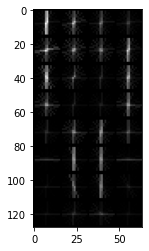

In [55]:
plt.imshow(hog_img,cmap = 'gray')

# Se extraen las features del HOG para ambos tipos de datos

In [64]:
peaton_hog_accum = []

for i in peaton:
    img_color = mpimg.imread(i)
    img_gray_ = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    peaton_hog_feature, peaton_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2 ),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    peaton_hog_accum.append(peaton_hog_feature)

In [65]:
X_peaton = np.vstack(peaton_hog_accum).astype(np.float64)
y_peaton = np.ones(len(X_peaton))

In [66]:
X_peaton.shape

(924, 9900)

In [67]:
y_peaton.shape

(924,)

In [68]:
no_peaton_hog_accum = []

for i in no_peaton:
    img_color = mpimg.imread(i)
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    
    no_peaton_hog_feature, no_peaton_hog_img = hog(img_gray,
                                               orientations = 11,
                                               pixels_per_cell = (16,16),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)
    
    no_peaton_hog_accum.append(no_peaton_hog_feature)

In [69]:
X_no_peaton = np.vstack(no_peaton_hog_accum).astype(np.float64)
y_no_peaton = np.zeros(len(X_no_peaton))

In [70]:
X_no_peaton.shape

(50, 9900)

In [71]:
y_no_peaton.shape

(50,)

# Se combinan ambos tipos de datos para alimentar el SVM

In [72]:
X = np.vstack((X_peaton,X_no_peaton))
X.shape

(974, 9900)

In [73]:
y = np.hstack((y_peaton,y_no_peaton))
y.shape

(974,)

# Se generan los datos de entrenamiento y de prueba

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [75]:
X_train.shape

(681, 9900)

In [76]:
X_test.shape

(293, 9900)

# Se importa el Clasificador y se entrena

In [77]:
#from sklearn.svm import LinearSVC

#svc_model = LinearSVC()
#svc_model.fit(X_train, y_train)
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [78]:
y_predict = svc_model.predict(X_test)

<AxesSubplot:>

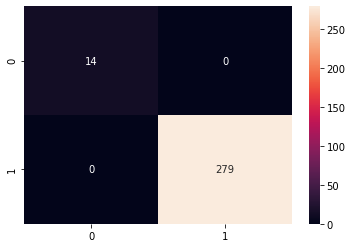

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

In [80]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00       279

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



# GridSearchCV

In [81]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [82]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [83]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [84]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [85]:
grid_predictions = grid.predict(X_test)

<AxesSubplot:>

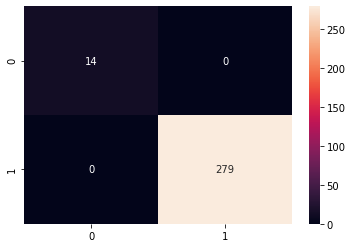

In [86]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d")

In [87]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00       279

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



# Gracias por la atención